In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Collect or Load data

In [2]:
df = pd.read_csv('diabetes1.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## 2. Basic Checks

In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3. EDA

### i. Uivariate Analysis

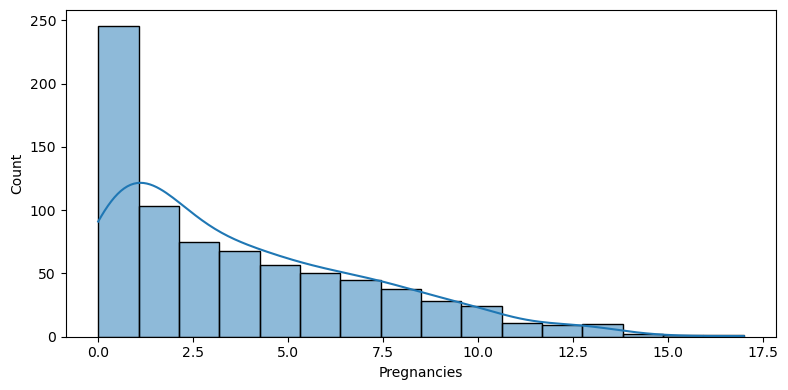

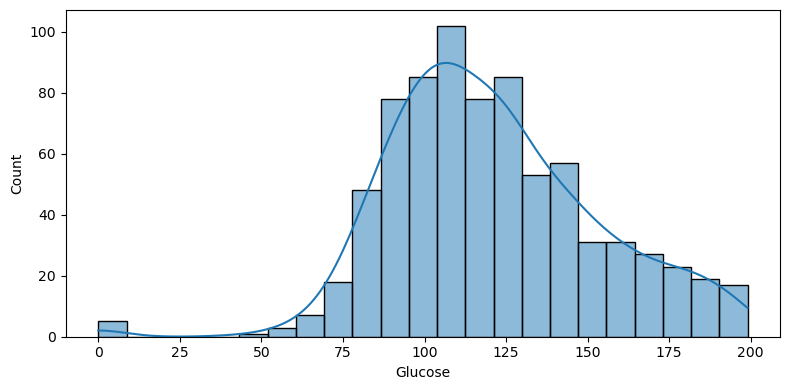

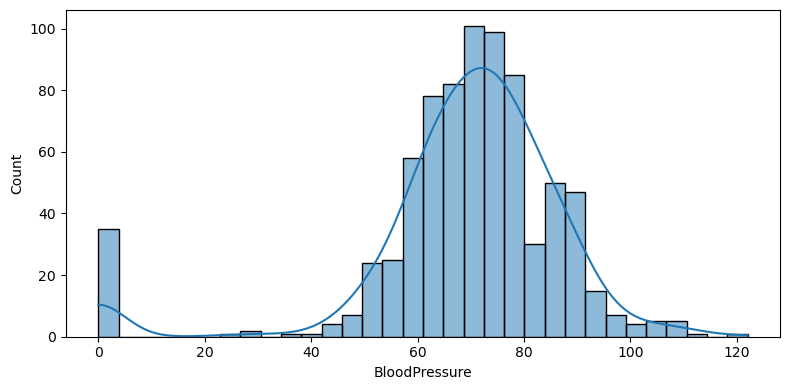

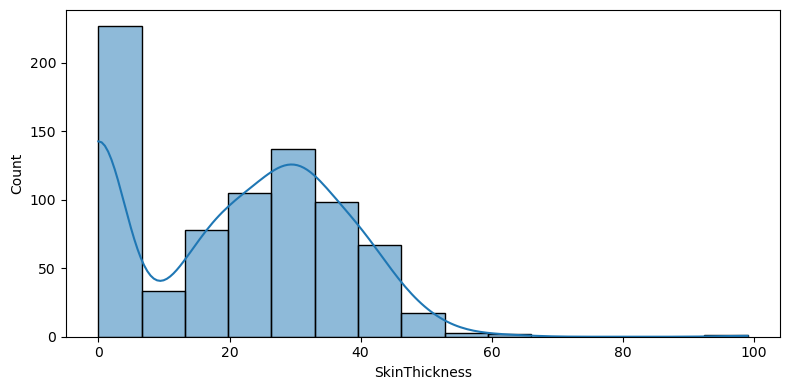

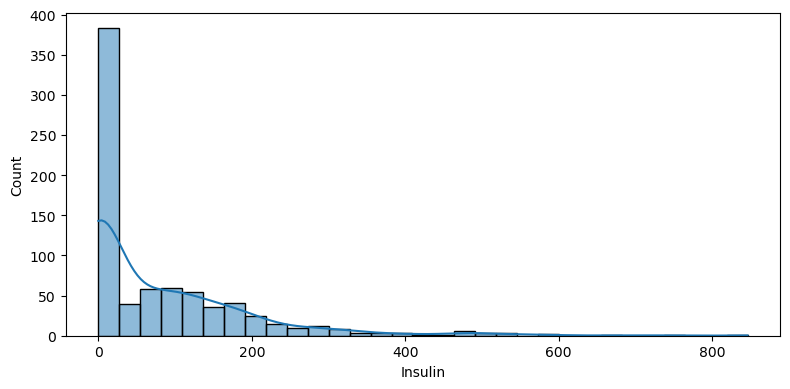

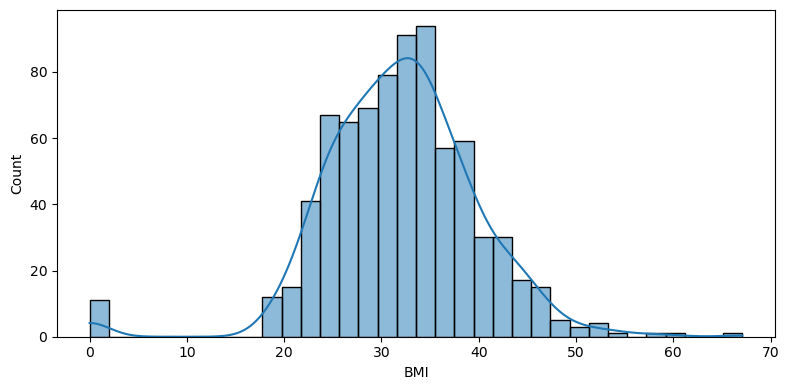

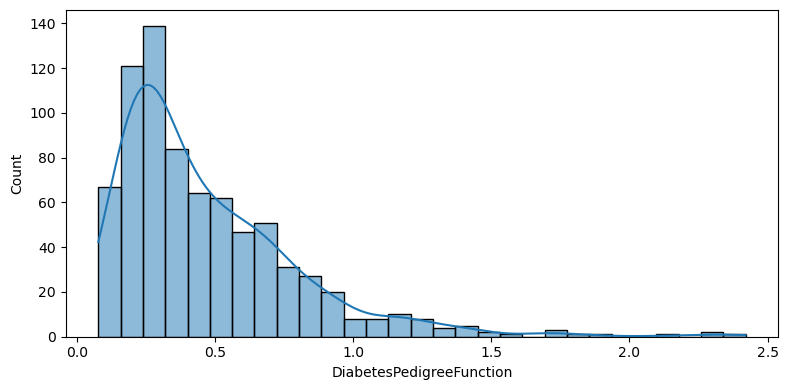

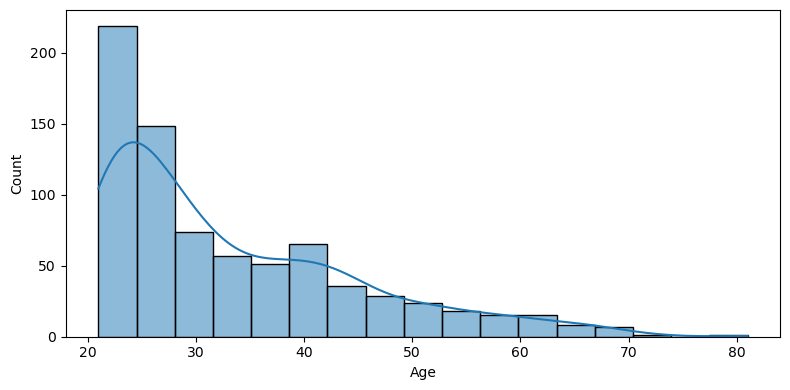

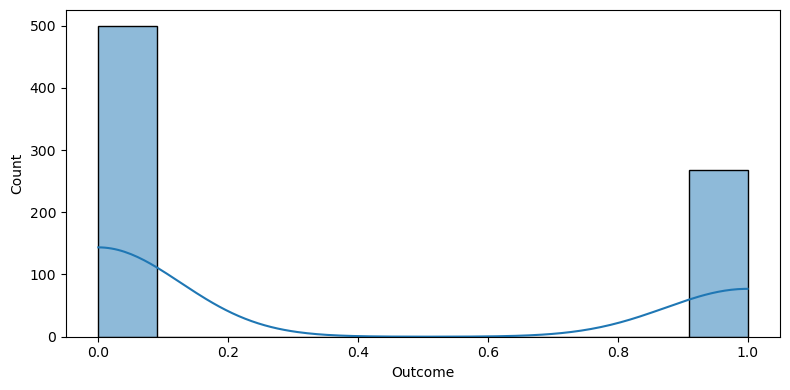

In [5]:
for col in df:
    plt.figure(figsize=(8,4))
    sns.histplot(x=col, data=df, kde=True)
    plt.tight_layout()
    plt.show()

### ii. Bivariate Analysis

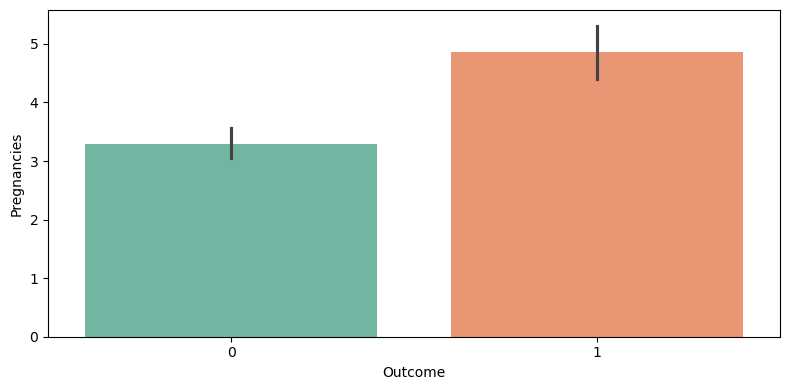

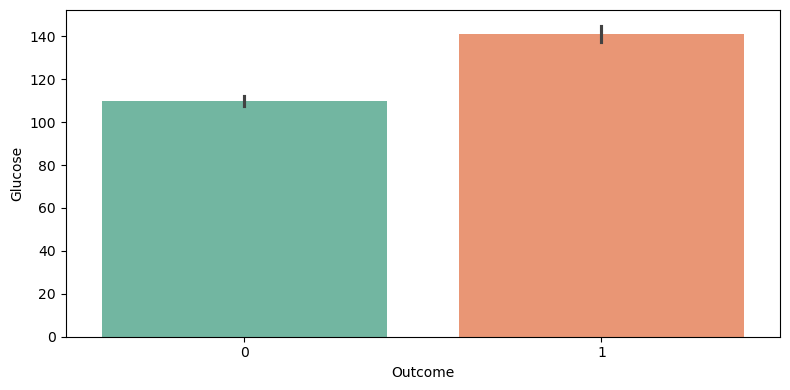

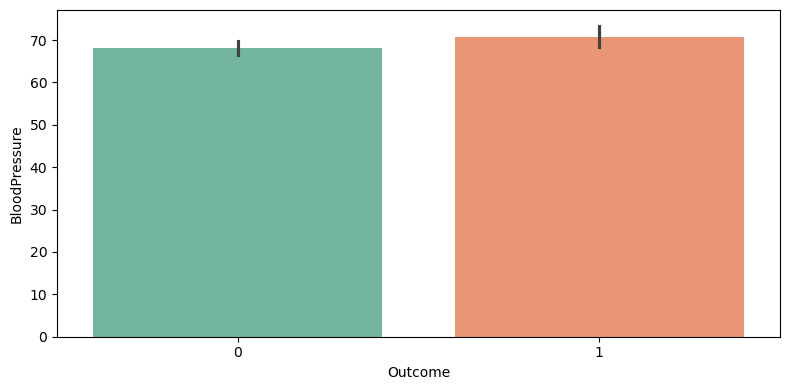

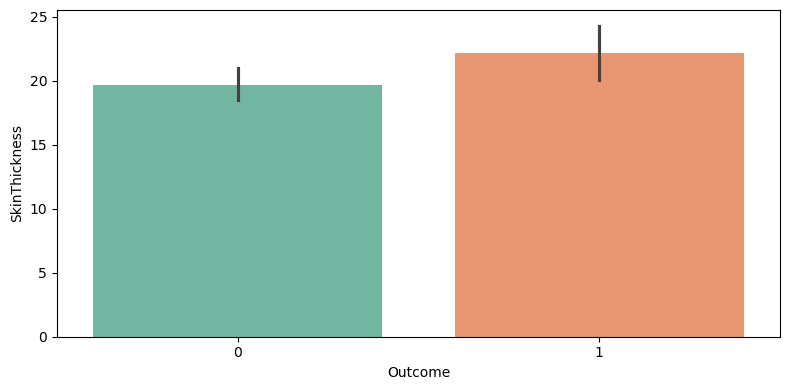

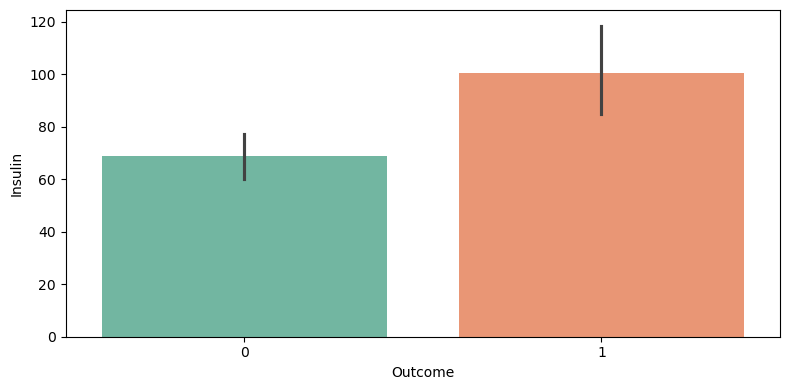

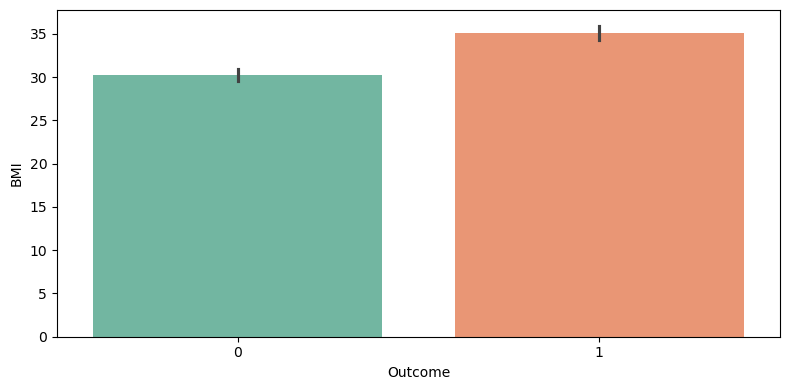

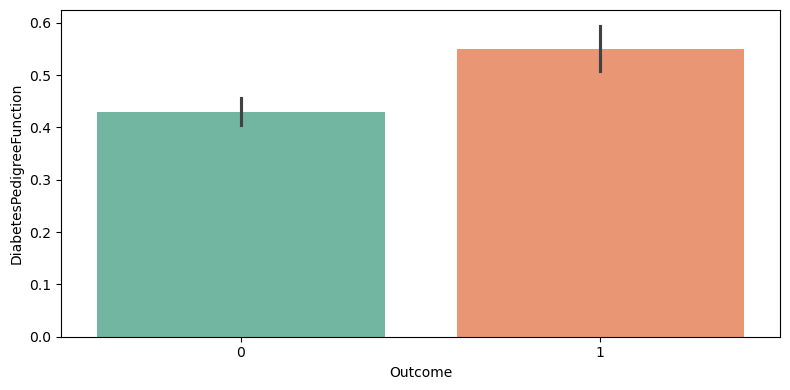

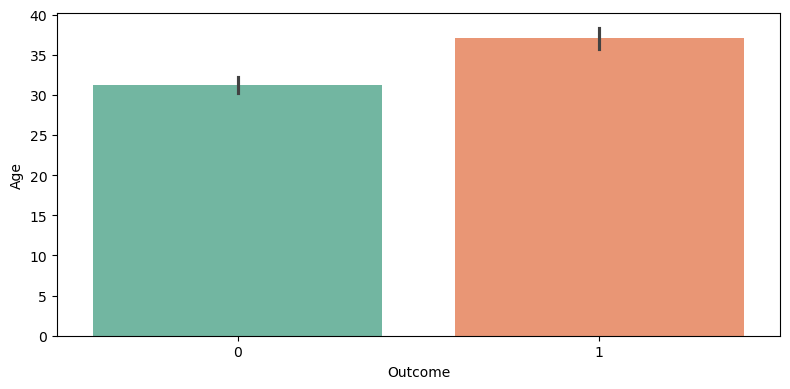

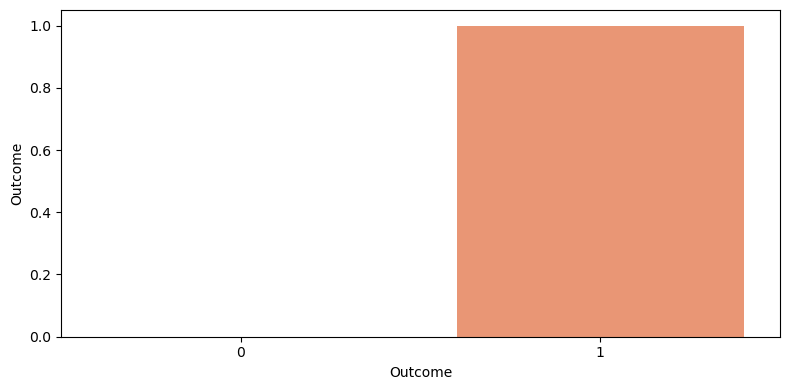

In [19]:
for col in df:
    plt.figure(figsize=(8,4))
    sns.barplot(data=df, x='Outcome', y=col, palette='Set2')
    plt.tight_layout()
    plt.show()

## iii. Multivariate Analysis

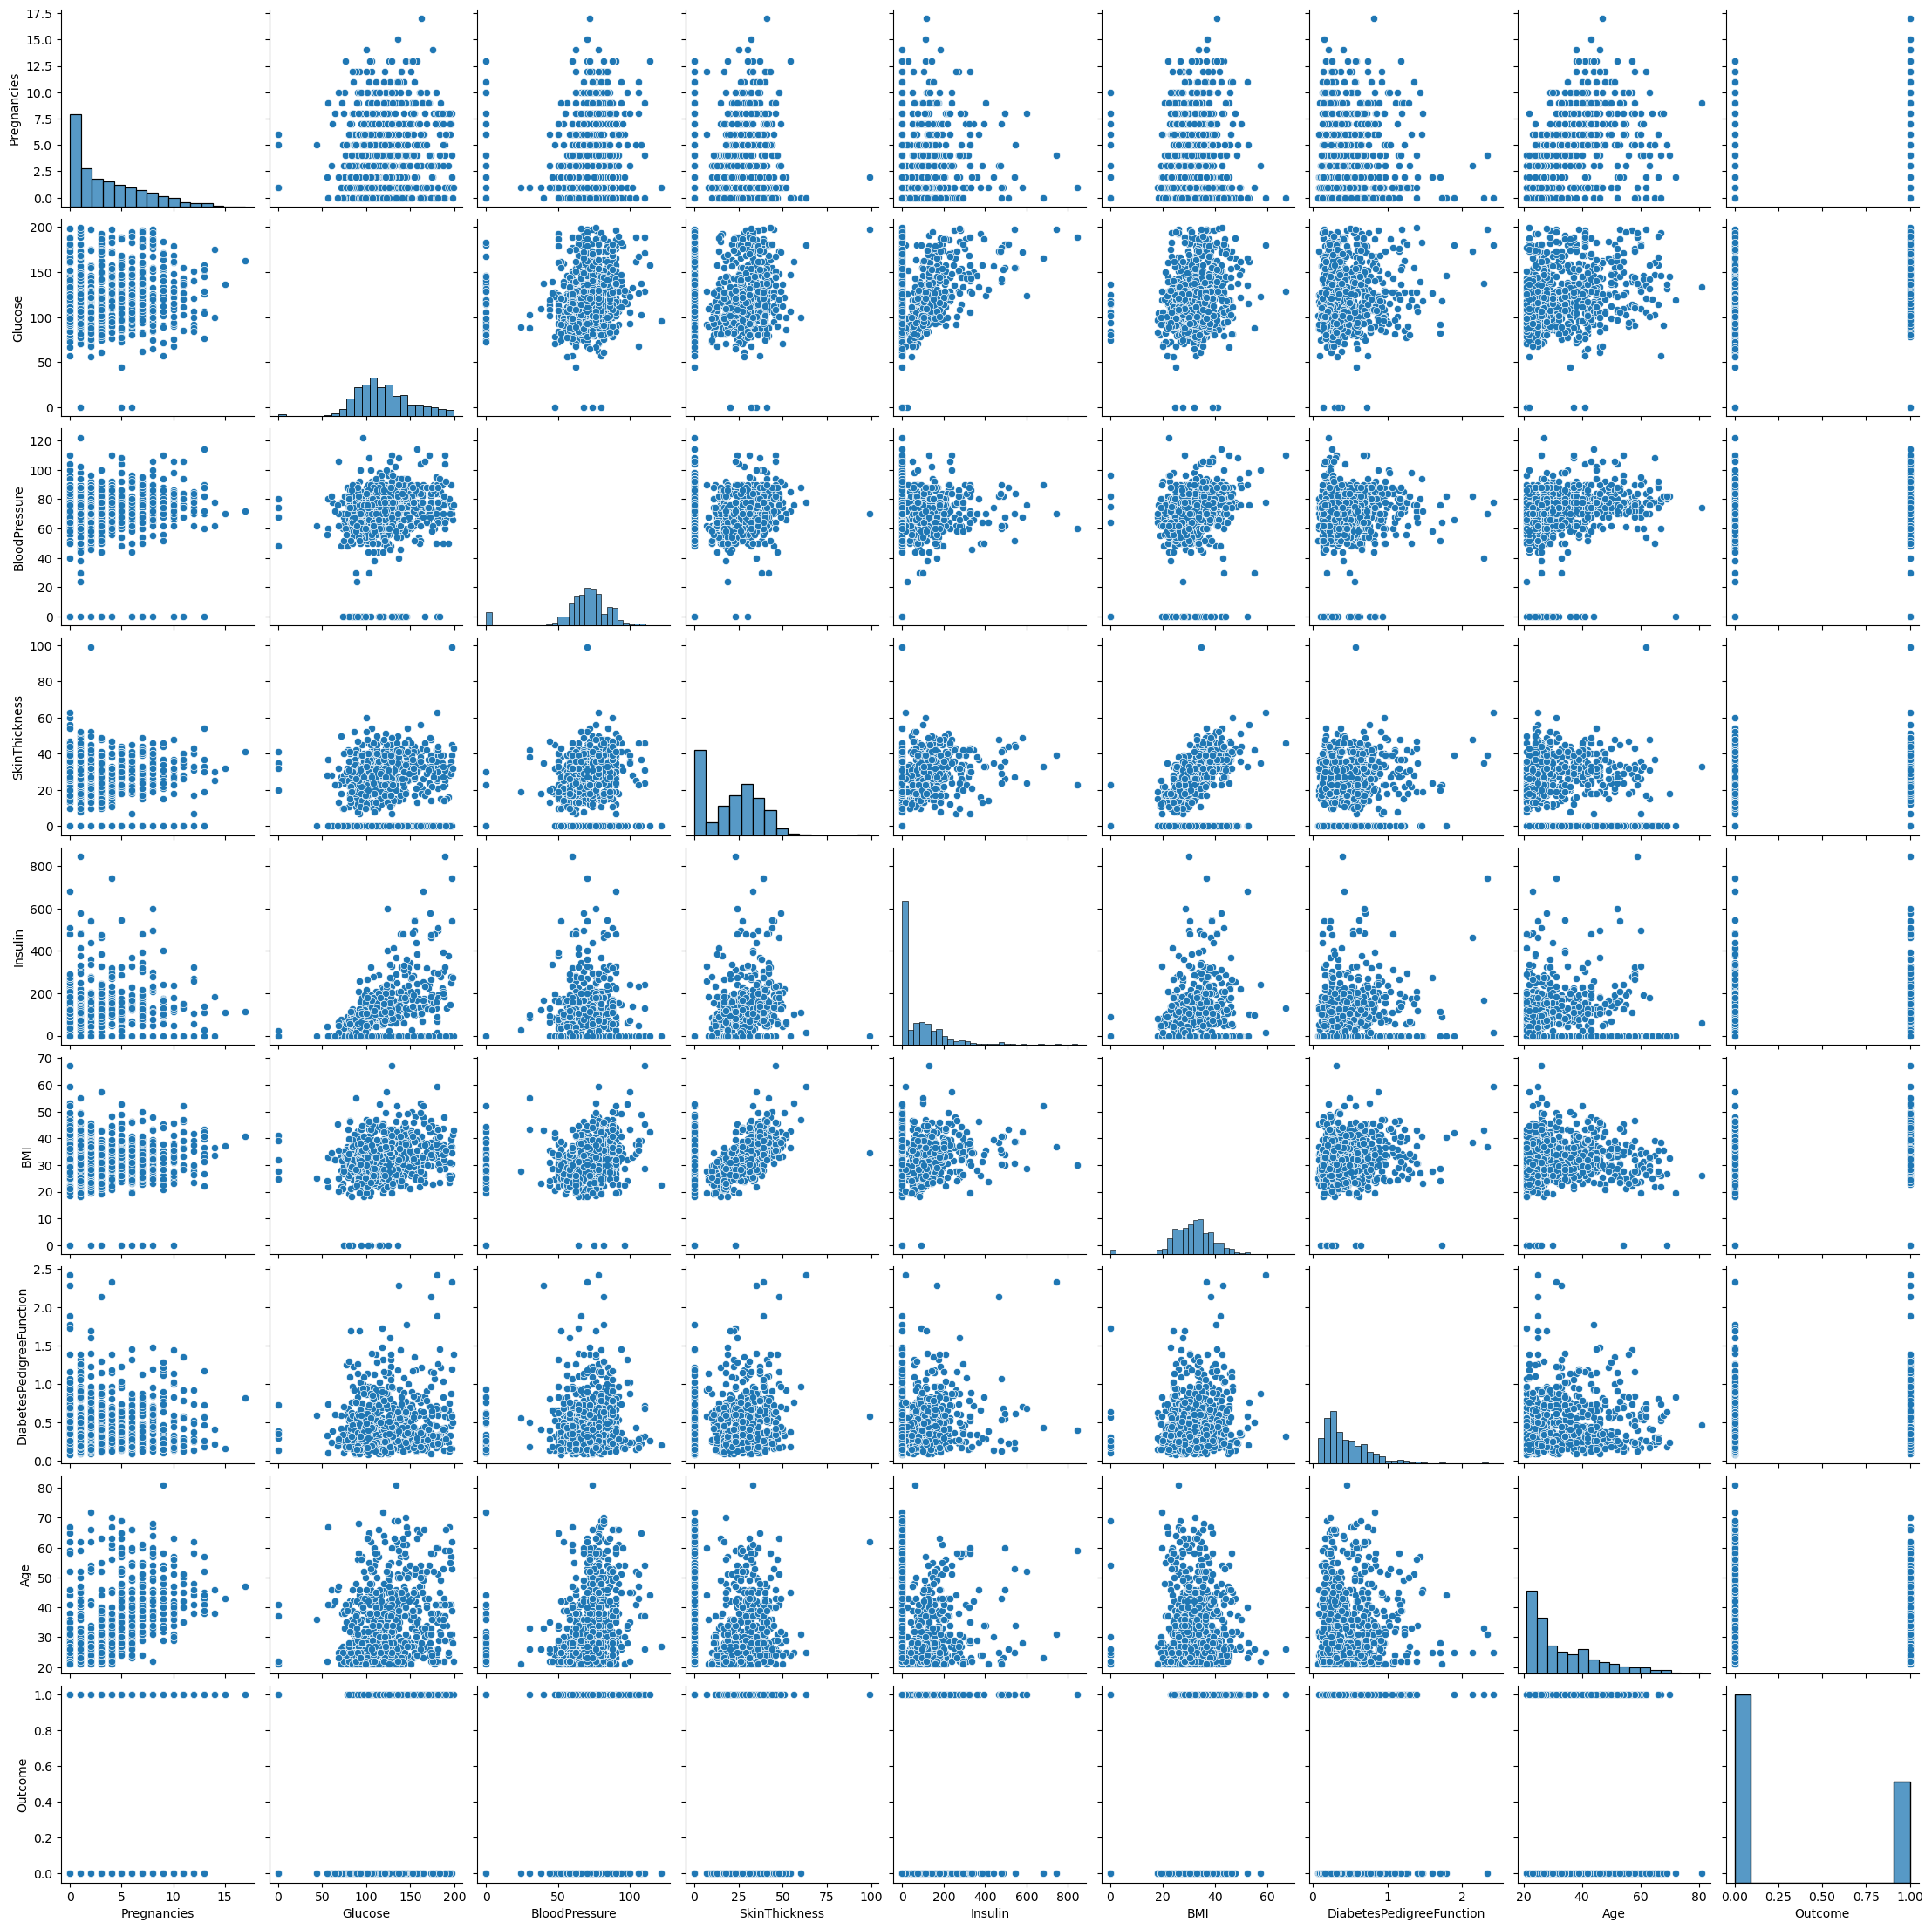

In [15]:
sns.pairplot(df)

## 4. Data Preprocessing

### i. Checking for outliers/Null values

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

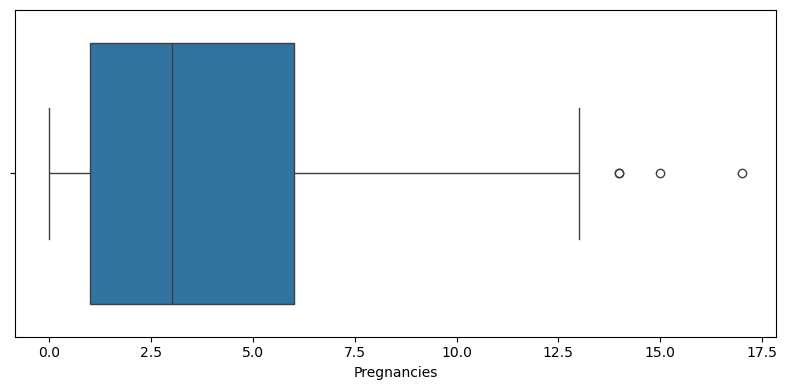

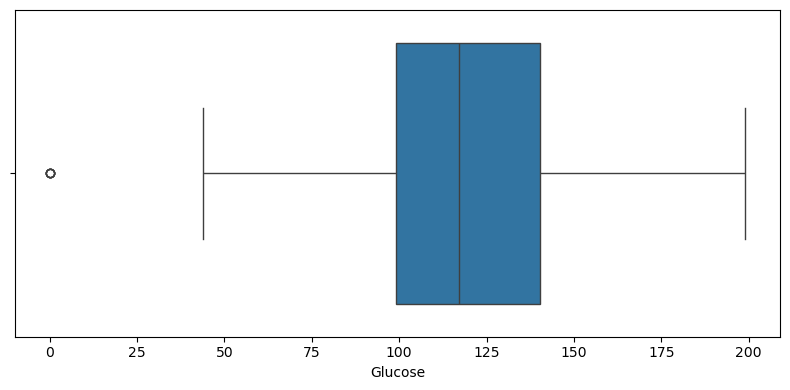

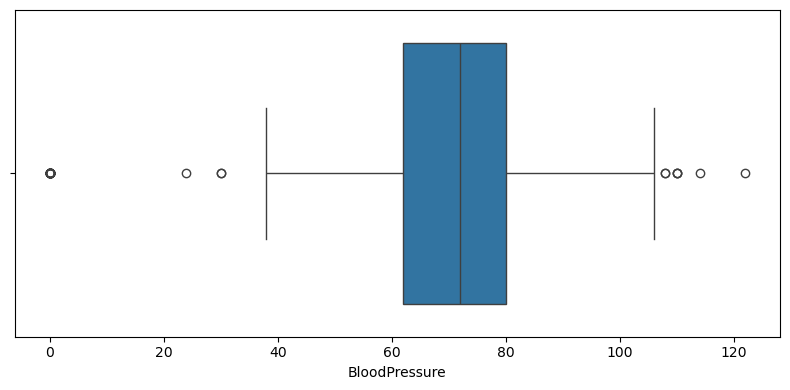

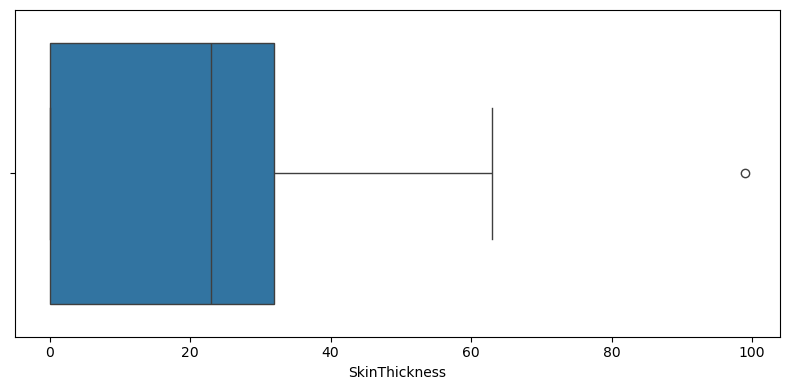

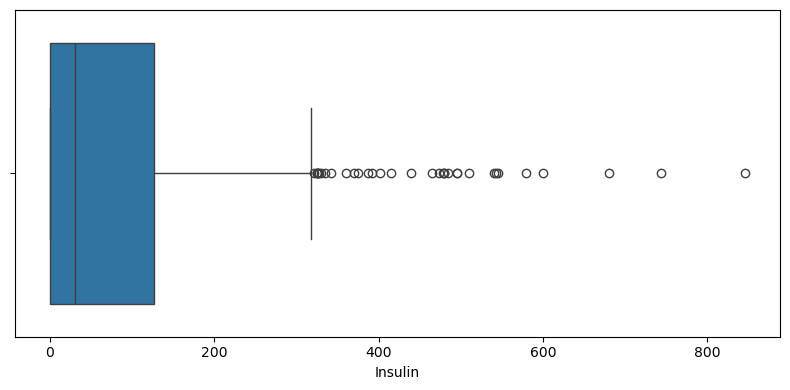

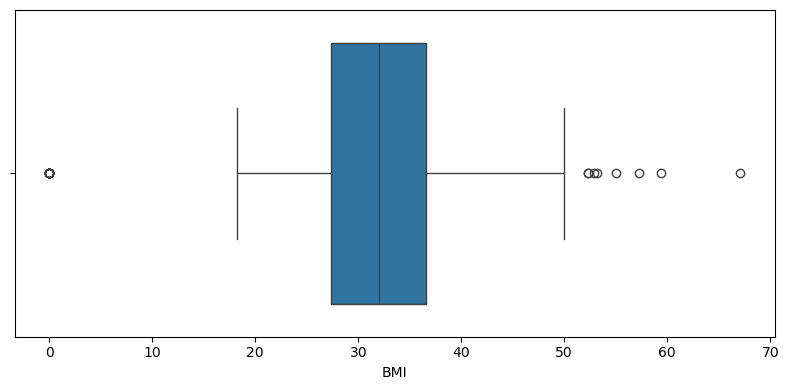

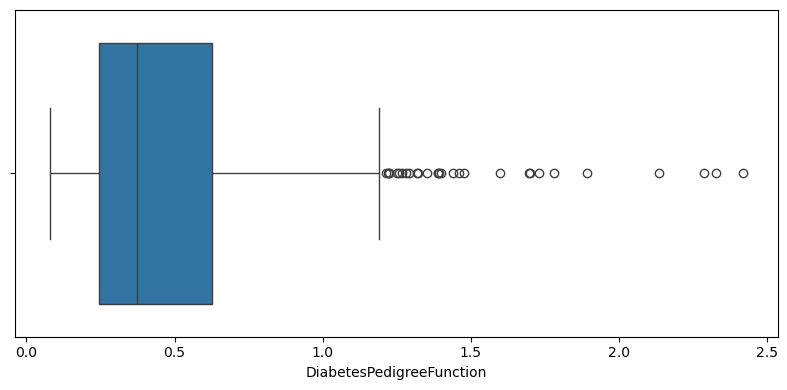

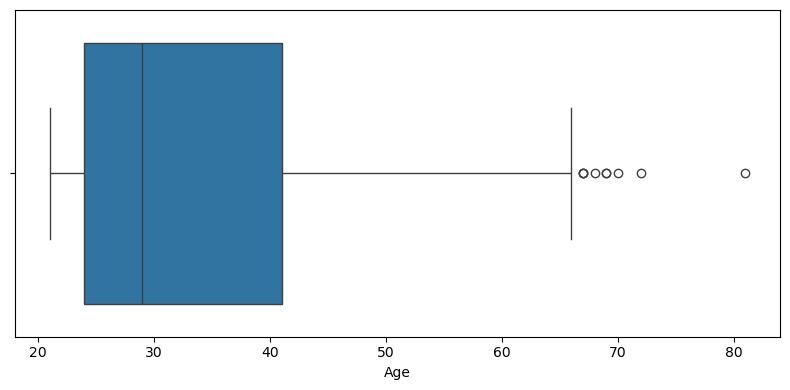

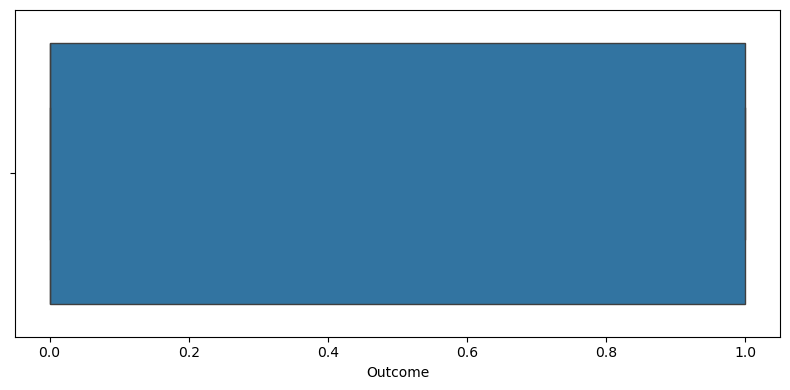

In [7]:
for col in df:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, data=df)
    plt.tight_layout()
    plt.show()

In [8]:
for col in df:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - iqr * 1.5
    ub = q3 + iqr * 1.5
    median = df[col].median()
    print(f"{col} q1:", q1)
    print(f"{col} q3:", q3)
    print(f"{col} iqr:", iqr)
    print(f"{col} lb:", lb)
    print(f"{col} ub:", ub)
    print(f"{col} median:", median)
    print("-------------------------------------------------------------------")

Pregnancies q1: 1.0
Pregnancies q3: 6.0
Pregnancies iqr: 5.0
Pregnancies lb: -6.5
Pregnancies ub: 13.5
Pregnancies median: 3.0
-------------------------------------------------------------------
Glucose q1: 99.0
Glucose q3: 140.25
Glucose iqr: 41.25
Glucose lb: 37.125
Glucose ub: 202.125
Glucose median: 117.0
-------------------------------------------------------------------
BloodPressure q1: 62.0
BloodPressure q3: 80.0
BloodPressure iqr: 18.0
BloodPressure lb: 35.0
BloodPressure ub: 107.0
BloodPressure median: 72.0
-------------------------------------------------------------------
SkinThickness q1: 0.0
SkinThickness q3: 32.0
SkinThickness iqr: 32.0
SkinThickness lb: -48.0
SkinThickness ub: 80.0
SkinThickness median: 23.0
-------------------------------------------------------------------
Insulin q1: 0.0
Insulin q3: 127.25
Insulin iqr: 127.25
Insulin lb: -190.875
Insulin ub: 318.125
Insulin median: 30.5
-------------------------------------------------------------------
BMI q1: 27.3


In [9]:
df.loc[(df['Pregnancies'] > 13.5), 'Pregnancies'] = 3

In [10]:
df.loc[(df['Glucose'] < 37.125), 'Glucose'] = 117

In [11]:
df.loc[(df['BloodPressure'] < 35) | (df['BloodPressure'] > 107), 'BloodPressure'] = 72

In [12]:
df.loc[(df['SkinThickness'] > 80), 'SkinThickness'] = 23

In [13]:
df.loc[(df['Insulin'] > 318.125), 'Insulin'] = 30.5

In [14]:
# Handled corrupted data too
df.loc[(df['Insulin'] == 0), 'Insulin'] = 30.5

In [15]:
df.loc[(df['BMI'] < 13.35) | (df['BMI'] > 50.550000000000004), 'BMI'] = 32

In [16]:
df.loc[(df['DiabetesPedigreeFunction'] > 1.2), 'DiabetesPedigreeFunction'] = 0.3725

In [17]:
df.loc[(df['Age'] > 66.5), 'Age']  = 29

### ii. Scaling

In [18]:
X = df.iloc[:,:-1]
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64              0     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60              0     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                      0.6270   50  
1                      0.3510   31  
2                      0.6720   32  
3                      0.1670   21  
4                      0.3725   33  
..                        ...  ...  
763                    0.1710   63  
764                    0.3400   27  
765                    0.2450   30  
766                    0.3490   47  
767                    0.3150   23  

[768 rows x 8 columns]

In [19]:
y = df[['Outcome']]
y

Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = df.drop('Outcome', axis=1)
columns = columns.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = columns)

In [26]:
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.678427  0.866045      -0.017650       0.928238 -0.679253  0.218695   
1      -0.851320 -1.205066      -0.556276       0.545788 -0.679253 -0.873966   
2       1.290326  2.016662      -0.735818      -1.302720 -0.679253 -1.389077   
3      -0.851320 -1.073567      -0.556276       0.163338  0.273487 -0.639824   
4      -1.157270  0.504422      -2.890320       0.928238  1.383767  1.701591   
..           ...       ...            ...            ...       ...       ...   
763     1.902225 -0.679069       0.341433       1.756879  1.563813  0.109429   
764    -0.545371  0.011301      -0.197192       0.418305 -0.679253  0.718196   
765     0.372477 -0.021574      -0.017650       0.163338  0.543555 -0.936403   
766    -0.851320  0.142800      -1.094901      -1.302720 -0.679253 -0.327635   
767    -0.851320 -0.942068      -0.197192       0.673271 -0.679253 -0.280807   

     DiabetesPedigreeFunction       Age  
0                    0.813594  1.560400  
1                   -0.312924 -0.159340  
2                    0.997265 -0.068827  
3                   -1.063936 -1.064466  
4                   -0.225170  0.021685  
..                        ...       ...  
763                 -1.047610  2.737063  
764                 -0.357822 -0.521390  
765                 -0.745573 -0.249853  
766                 -0.321088  1.288862  
767                 -0.459862 -0.883441  

[768 rows x 8 columns]

## 5. Feature Selection

In [36]:
# Combine X_scaled and y into a single DataFrame
df_scaled = pd.concat([X, y.reset_index(drop=True)], axis=1)

In [38]:
df_scaled

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.678427  0.866045      -0.017650       0.928238 -0.679253  0.218695   
1      -0.851320 -1.205066      -0.556276       0.545788 -0.679253 -0.873966   
2       1.290326  2.016662      -0.735818      -1.302720 -0.679253 -1.389077   
3      -0.851320 -1.073567      -0.556276       0.163338  0.273487 -0.639824   
4      -1.157270  0.504422      -2.890320       0.928238  1.383767  1.701591   
..           ...       ...            ...            ...       ...       ...   
763     1.902225 -0.679069       0.341433       1.756879  1.563813  0.109429   
764    -0.545371  0.011301      -0.197192       0.418305 -0.679253  0.718196   
765     0.372477 -0.021574      -0.017650       0.163338  0.543555 -0.936403   
766    -0.851320  0.142800      -1.094901      -1.302720 -0.679253 -0.327635   
767    -0.851320 -0.942068      -0.197192       0.673271 -0.679253 -0.280807   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.813594  1.560400        1  
1                   -0.312924 -0.159340        0  
2                    0.997265 -0.068827        1  
3                   -1.063936 -1.064466        0  
4                   -0.225170  0.021685        1  
..                        ...       ...      ...  
763                 -1.047610  2.737063        0  
764                 -0.357822 -0.521390        0  
765                 -0.745573 -0.249853        0  
766                 -0.321088  1.288862        1  
767                 -0.459862 -0.883441        0  

[768 rows x 9 columns]

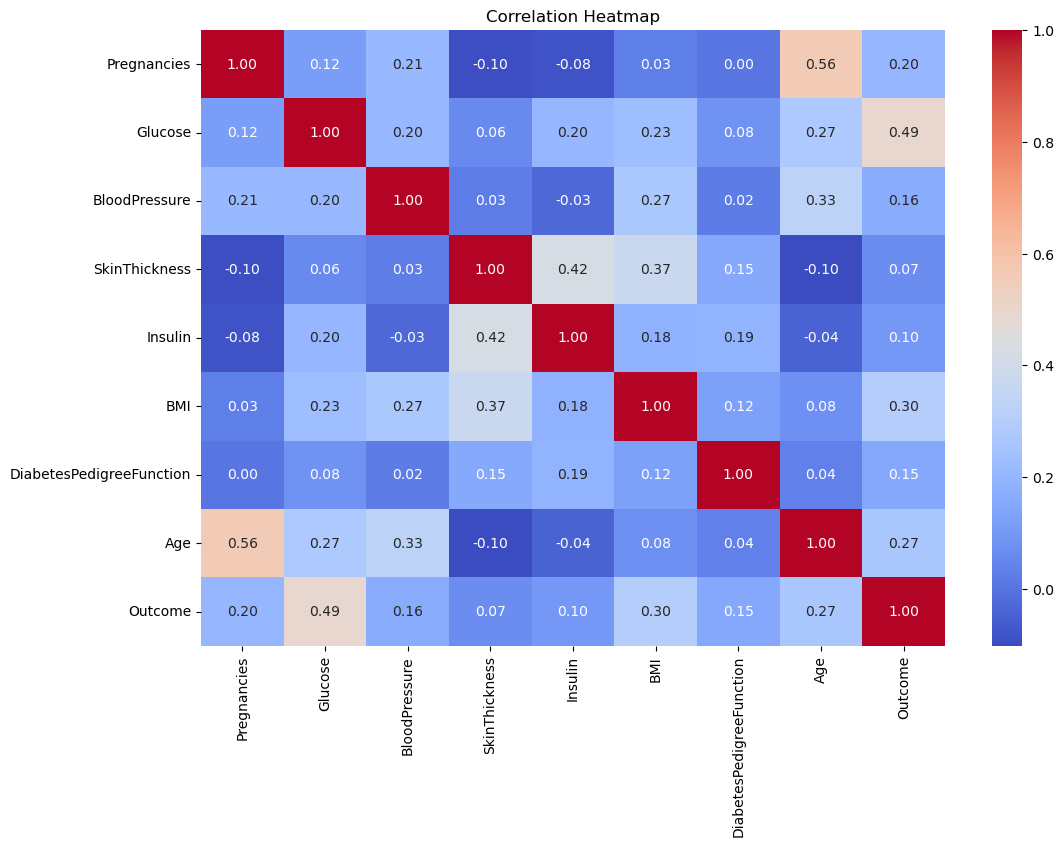

In [39]:
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(df_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 7. Feature Extraction

In [45]:
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.678427  0.866045      -0.017650       0.928238 -0.679253  0.218695   
1      -0.851320 -1.205066      -0.556276       0.545788 -0.679253 -0.873966   
2       1.290326  2.016662      -0.735818      -1.302720 -0.679253 -1.389077   
3      -0.851320 -1.073567      -0.556276       0.163338  0.273487 -0.639824   
4      -1.157270  0.504422      -2.890320       0.928238  1.383767  1.701591   
..           ...       ...            ...            ...       ...       ...   
763     1.902225 -0.679069       0.341433       1.756879  1.563813  0.109429   
764    -0.545371  0.011301      -0.197192       0.418305 -0.679253  0.718196   
765     0.372477 -0.021574      -0.017650       0.163338  0.543555 -0.936403   
766    -0.851320  0.142800      -1.094901      -1.302720 -0.679253 -0.327635   
767    -0.851320 -0.942068      -0.197192       0.673271 -0.679253 -0.280807   

     DiabetesPedigreeFunction       Age  
0                    0.813594  1.560400  
1                   -0.312924 -0.159340  
2                    0.997265 -0.068827  
3                   -1.063936 -1.064466  
4                   -0.225170  0.021685  
..                        ...       ...  
763                 -1.047610  2.737063  
764                 -0.357822 -0.521390  
765                 -0.745573 -0.249853  
766                 -0.321088  1.288862  
767                 -0.459862 -0.883441  

[768 rows x 8 columns]

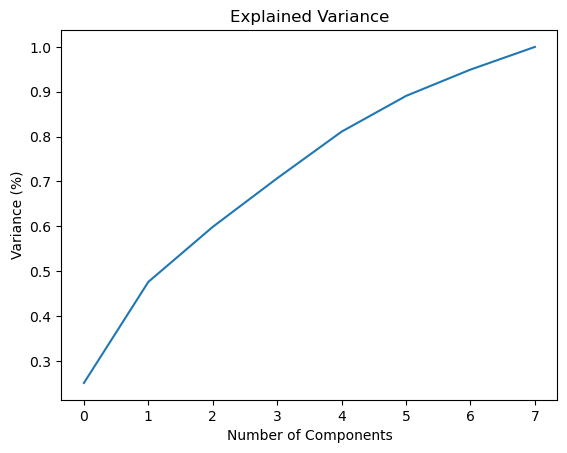

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
pc=pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [47]:
np.where(np.cumsum(pca.explained_variance_ratio_)<=0.90)

(array([0, 1, 2, 3, 4, 5], dtype=int64),)

In [48]:
pca = PCA(n_components=6)
new_data = pca.fit_transform(df_scaled)

In [49]:
new_data

array([[ 1.71224814, -0.45304123,  0.66481993, -0.23060794,  0.03212365,
        -0.83652493],
       [-1.61476958,  0.10821649, -0.11567086, -0.54567353, -0.47243539,
         0.1442922 ],
       [ 0.29831774, -1.51125013,  1.92074548,  1.31901358,  1.27047618,
        -0.69566308],
       ...,
       [-0.41403018, -0.15787237,  0.12144567,  0.59998154, -0.84992715,
         0.70882968],
       [-0.623508  , -1.15899803,  0.40792249,  0.84518582,  0.55985299,
        -0.72686966],
       [-1.44505972,  0.55140725, -0.77132325, -0.54173359, -0.22696545,
         0.02031176]])

In [50]:
# This will be the new data fed to the algorithm.

# Column names pattern
column_names = [f'principal component {i}' for i in range(1,7)]

# Create DataFrame
principal_df = pd.DataFrame(data=new_data, columns=column_names)
principal_df

principal component 1  principal component 2  principal component 3  \
0                 1.712248              -0.453041               0.664820   
1                -1.614770               0.108216              -0.115671   
2                 0.298318              -1.511250               1.920745   
3                -1.887950               0.613706              -0.556492   
4                -0.113539               2.533308               0.450380   
..                     ...                    ...                    ...   
763               2.277492              -0.502173               0.372126   
764              -0.403469               0.487241              -0.937843   
765              -0.414030              -0.157872               0.121446   
766              -0.623508              -1.158998               0.407922   
767              -1.445060               0.551407              -0.771323   

     principal component 4  principal component 5  principal component 6  
0                -0.230608               0.032124              -0.836525  
1                -0.545674              -0.472435               0.144292  
2                 1.319014               1.270476              -0.695663  
3                 0.207981              -0.743323               0.467867  
4                 1.362703              -0.775873              -2.141594  
..                     ...                    ...                    ...  
763              -0.246117              -3.350890               0.667432  
764              -0.153056               0.167597              -0.688005  
765               0.599982              -0.849927               0.708830  
766               0.845186               0.559853              -0.726870  
767              -0.541734              -0.226965               0.020312  

[768 rows x 6 columns]

In [52]:
principal_df = pd.concat([principal_df, y.reset_index(drop=True)], axis=1)
principal_df

principal component 1  principal component 2  principal component 3  \
0                 1.712248              -0.453041               0.664820   
1                -1.614770               0.108216              -0.115671   
2                 0.298318              -1.511250               1.920745   
3                -1.887950               0.613706              -0.556492   
4                -0.113539               2.533308               0.450380   
..                     ...                    ...                    ...   
763               2.277492              -0.502173               0.372126   
764              -0.403469               0.487241              -0.937843   
765              -0.414030              -0.157872               0.121446   
766              -0.623508              -1.158998               0.407922   
767              -1.445060               0.551407              -0.771323   

     principal component 4  principal component 5  principal component 6  \
0                -0.230608               0.032124              -0.836525   
1                -0.545674              -0.472435               0.144292   
2                 1.319014               1.270476              -0.695663   
3                 0.207981              -0.743323               0.467867   
4                 1.362703              -0.775873              -2.141594   
..                     ...                    ...                    ...   
763              -0.246117              -3.350890               0.667432   
764              -0.153056               0.167597              -0.688005   
765               0.599982              -0.849927               0.708830   
766               0.845186               0.559853              -0.726870   
767              -0.541734              -0.226965               0.020312   

     Outcome  
0          1  
1          0  
2          1  
3          0  
4          1  
..       ...  
763        0  
764        0  
765        0  
766        1  
767        0  

[768 rows x 7 columns]

## 8. Split the data

In [53]:
X = principal_df.drop('Outcome', axis=1)
X

principal component 1  principal component 2  principal component 3  \
0                 1.712248              -0.453041               0.664820   
1                -1.614770               0.108216              -0.115671   
2                 0.298318              -1.511250               1.920745   
3                -1.887950               0.613706              -0.556492   
4                -0.113539               2.533308               0.450380   
..                     ...                    ...                    ...   
763               2.277492              -0.502173               0.372126   
764              -0.403469               0.487241              -0.937843   
765              -0.414030              -0.157872               0.121446   
766              -0.623508              -1.158998               0.407922   
767              -1.445060               0.551407              -0.771323   

     principal component 4  principal component 5  principal component 6  
0                -0.230608               0.032124              -0.836525  
1                -0.545674              -0.472435               0.144292  
2                 1.319014               1.270476              -0.695663  
3                 0.207981              -0.743323               0.467867  
4                 1.362703              -0.775873              -2.141594  
..                     ...                    ...                    ...  
763              -0.246117              -3.350890               0.667432  
764              -0.153056               0.167597              -0.688005  
765               0.599982              -0.849927               0.708830  
766               0.845186               0.559853              -0.726870  
767              -0.541734              -0.226965               0.020312  

[768 rows x 6 columns]

In [54]:
y = principal_df[['Outcome']]
y

Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [56]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 6)
X_test shape: (154, 6)
y_train shape: (614, 1)
y_test shape: (154, 1)


## 9. Fit the data to the model

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## 10. Model Evaluation

In [58]:
y_predict = model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("Confusion Matrix\n", confusion_matrix(y_test, y_predict))
print("Accuracy Score", accuracy_score(y_test, y_predict))
print("Precision score", precision_score(y_test, y_predict))
print("Recall Score", recall_score(y_test, y_predict))
print("f1 score", f1_score(y_test, y_predict))

Confusion Matrix
 [[90  9]
 [16 39]]
Accuracy Score 0.8376623376623377
Precision score 0.8125
Recall Score 0.7090909090909091
f1 score 0.7572815533980582


In [66]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        99
           1       0.81      0.71      0.76        55

    accuracy                           0.84       154
   macro avg       0.83      0.81      0.82       154
weighted avg       0.84      0.84      0.83       154



0.895684113865932


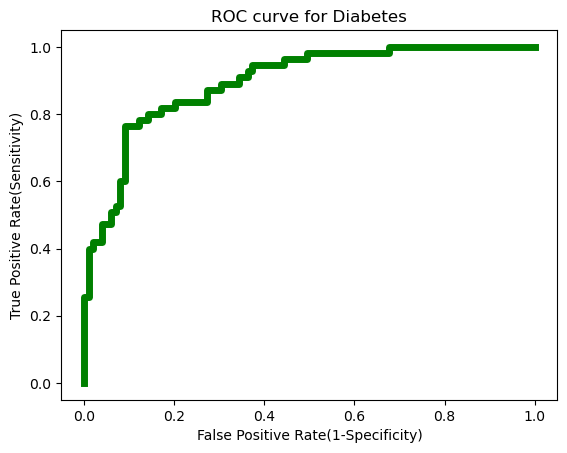

Score: 0.895684113865932


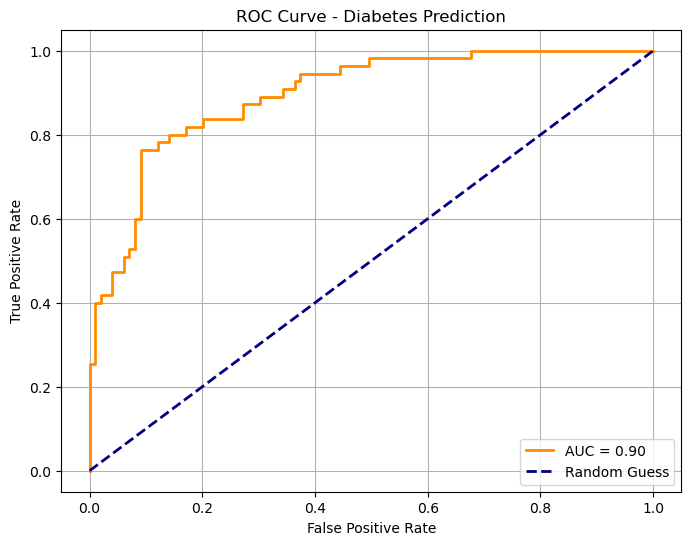

In [72]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Step 1: Get prediction probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]  # probability for class 1

# Step 2: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Step 3: Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Diabetes Prediction')
plt.legend(loc='lower right')
plt.grid(True)
print("Score:",roc_auc_score(y_test, y_predict))
plt.show()